## Business Problem

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,f_regression,SelectKBest,f_classif

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Import Data

In [3]:
df=pd.read_csv('E:/DataTrained/Intership_Flip Robo/final_projects/avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

## Data Inspection

In [4]:
#import pandas_profiling
#profile = pandas_profiling.ProfileReport(df)
#profile.to_widgets()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
# unnamed feature is just index so we will remove it 
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Data types are ok except date

In [7]:
df.shape

(18249, 13)

#### Dataset has 18249 rows and 14 columns.

In [8]:
# check duplicated data
df.duplicated().sum()

0

#### There are no duplicated records

In [9]:
# check the null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### There are no null values in Data.

In [10]:
# change the date datatype to date 
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

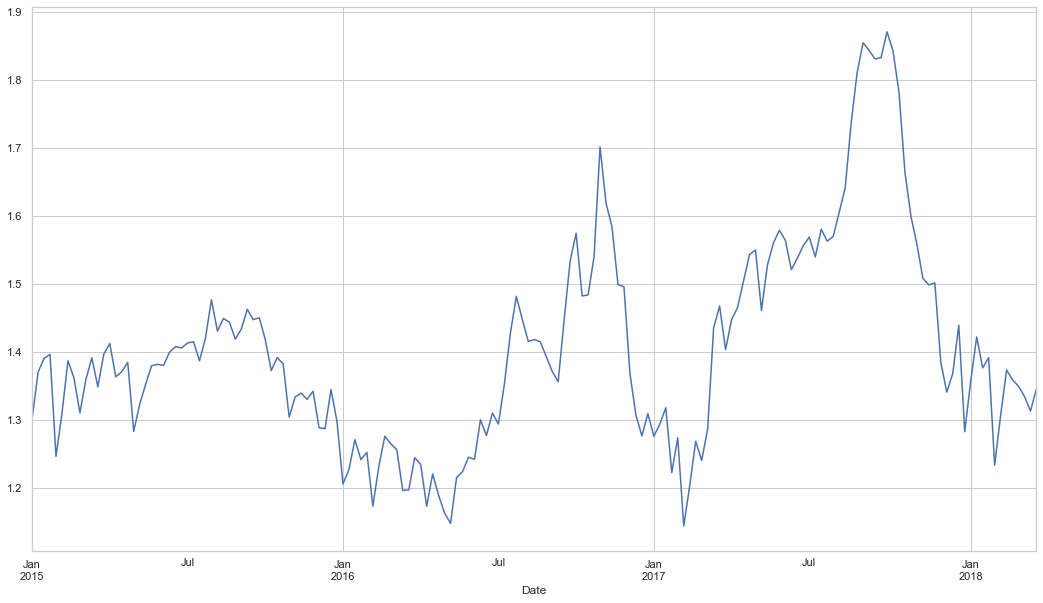

In [12]:
# Analysis of average price
plt.figure(figsize=(18,10))
df.groupby('Date')['AveragePrice'].mean().plot()
plt.show()

#### The peak of the average_price was between August and OCtober months in 2017

In [13]:
# drop the Date feature
df.drop('Date',axis = 1, inplace = True)

In [14]:
# split train data to continous and categorical varaiables.
df_num=df.select_dtypes(include=['float64','int64'])
df_cat=df.select_dtypes(include=['object'])

In [15]:
# Descriptive analysis for the  data
df_num.apply(continuous_var_summary)

AveragePrice  Total Volume          4046          4225          4770  \
N       18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
NMISS       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
SUM     25657.700000  1.552340e+10  5.347111e+09  5.386276e+09  4.168023e+08   
MEAN        1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
MEDIAN      1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
STD         0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
VAR         0.162148  1.192698e+13  1.600197e+12  1.449906e+12  1.154853e+10   
MIN         0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
P1          0.670000  1.177030e+03  0.000000e+00  1.056840e+01  0.000000e+00   
P5          0.830000  2.371862e+03  1.960000e+01  1.036140e+02  0.000000e+00   
P10         0.930000  3.896768e+03  9.427600e+01  3.674840e+02  0.000000e+00   
P25         1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
P50         1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
P75         1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
P90         1.930000  1.387046e+06  5.383852e+05  5.007846e+05  3.149244e+04   
P95         2.110000  3.716315e+06  1.263360e+06  1.303658e+06  1.061566e+05   
P99         2.540000  8.376759e+06  4.059374e+06  3.791560e+06  4.527798e+05   
MAX         3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

          Total Bags    Small Bags    Large Bags   XLarge Bags          year  \
N       1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
NMISS   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
SUM     4.373176e+09  3.324871e+09  9.916158e+08  5.668918e+07  3.679268e+07   
MEAN    2.396392e+05  1.821947e+05  5.433809e+04  3.106427e+03  2.016148e+03   
MEDIAN  3.974383e+04  2.636282e+04  2.647710e+03  0.000000e+00  2.016000e+03   
STD     9.862424e+05  7.461785e+05  2.439660e+05  1.769289e+04  9.399385e-01   
VAR     9.726741e+11  5.567824e+11  5.951939e+10  3.130385e+08  8.834843e-01   
MIN     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03   
P1      1.563736e+02  6.159200e+00  0.000000e+00  0.000000e+00  2.015000e+03   
P5      6.288900e+02  2.566700e+02  0.000000e+00  0.000000e+00  2.015000e+03   
P10     1.299208e+03  5.831100e+02  0.000000e+00  0.000000e+00  2.015000e+03   
P25     5.088640e+03  2.849420e+03  1.274700e+02  0.000000e+00  2.015000e+03   
P50     3.974383e+04  2.636282e+04  2.647710e+03  0.000000e+00  2.016000e+03   
P75     1.107834e+05  8.333767e+04  2.202925e+04  1.325000e+02  2.017000e+03   
P90     4.421419e+05  3.542669e+05  9.429534e+04  3.688912e+03  2.017000e+03   
P95     1.005479e+06  7.681472e+05  1.956998e+05  1.205845e+04  2.018000e+03   
P99     3.232558e+06  2.306055e+06  1.053996e+06  6.476548e+04  2.018000e+03   
MAX     1.937313e+07  1.338459e+07  5.719097e+06  5.516937e+05  2.018000e+03   

                Month            Day  
N        18249.000000   18249.000000  
NMISS        0.000000       0.000000  
SUM     112728.000000  285827.000000  
MEAN         6.177215      15.662612  
MEDIAN       6.000000      16.000000  
STD          3.534130       8.776281  
VAR         12.490075      77.023109  
MIN          1.000000       1.000000  
P1           1.000000       1.000000  
P5           1.000000       2.000000  
P10          1.000000       4.000000  
P25          3.000000       8.000000  
P50          6.000000      16.000000  
P75          9.000000      23.000000  
P90         11.000000      28.000000  
P95         12.000000      29.000000  
P99         12.000000      31.000000  
MAX         12.000000      31.000000

In [16]:
df_cat.describe(include=['O'])

type  region
count          18249   18249
unique             2      54
top     conventional  Albany
freq            9126     338

#### There are high cardinality in both Date and region

-------------------------------------------------------------------------------------------------------------------------------

## EDA

#### Univariate analysis

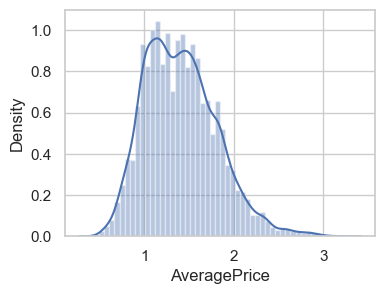

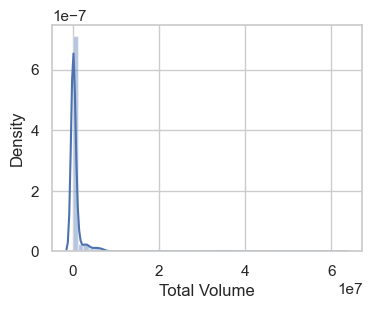

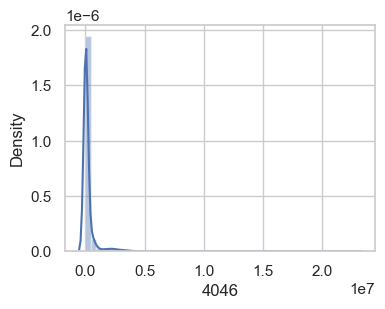

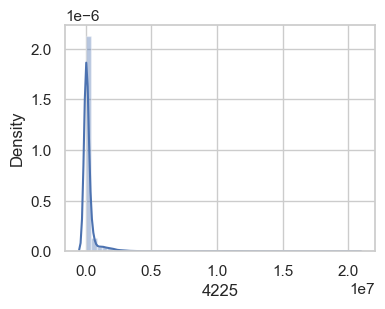

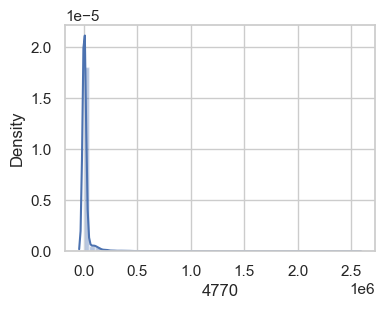

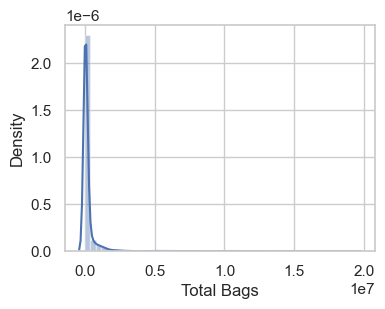

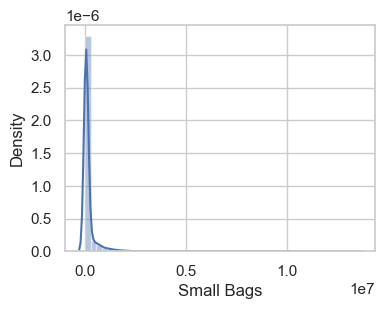

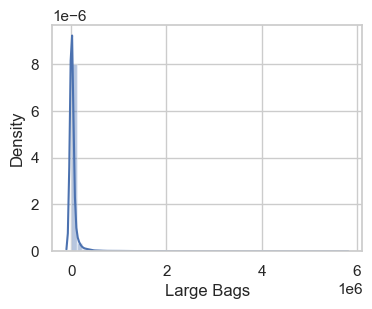

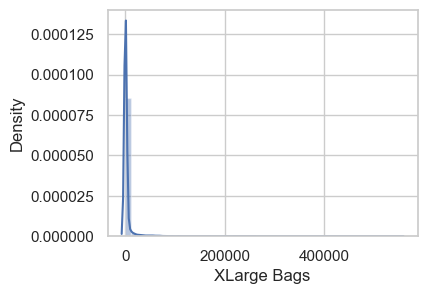

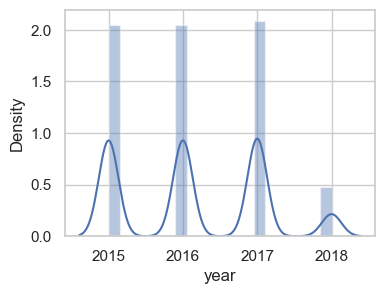

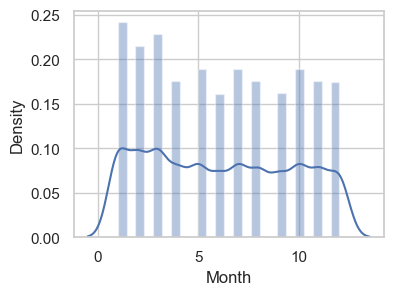

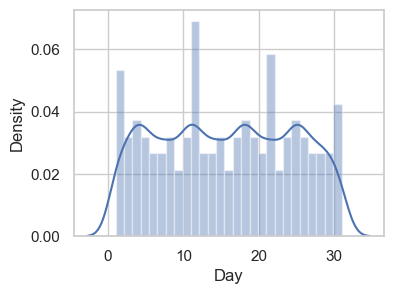

In [17]:
for col in df_num.columns:
    plt.figure(figsize=(4,3),dpi=100)
    sns.distplot(df_num[col])
    plt.show()

In [18]:
df.groupby('type')['Total Volume'].agg('sum')

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


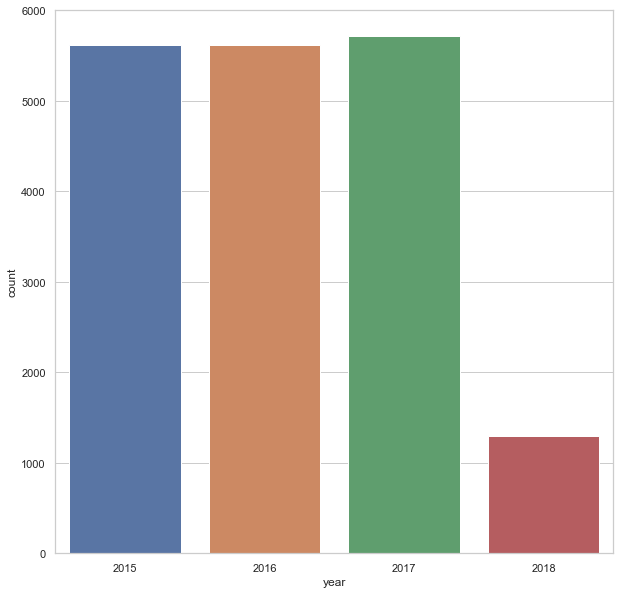

In [19]:
# count of year

print(df['year'].value_counts())

plt.figure(figsize = (10, 10))

sns.countplot(df['year'])

plt.show()

Text(0, 0.5, 'AveragePrice')

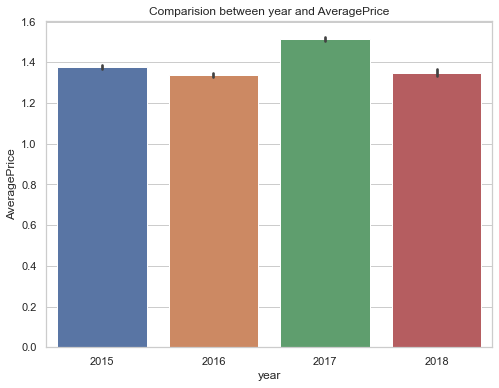

In [20]:
# Checking which year has maximum AveragePrice

plt.figure(figsize = [8, 6])

plt.title('Comparision between year and AveragePrice')

sns.barplot(df['year'], df['AveragePrice'], data = df);

plt.xlabel('year')

plt.ylabel('AveragePrice')

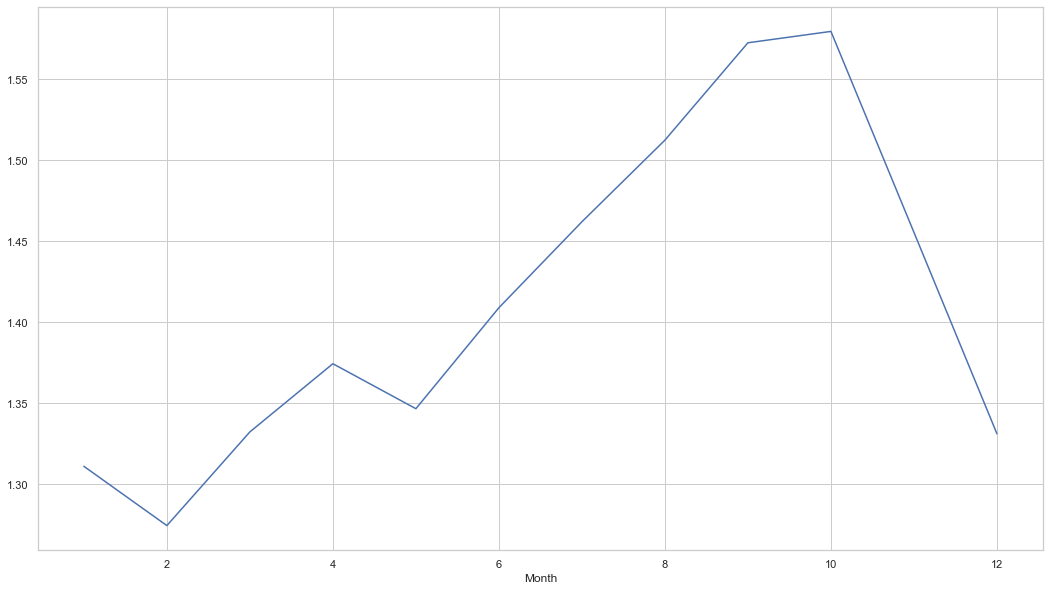

In [21]:
avg_price_month=df.groupby('Month')['AveragePrice'].mean()
plt.figure(figsize=(18,10))
avg_price_month.plot()
plt.show()

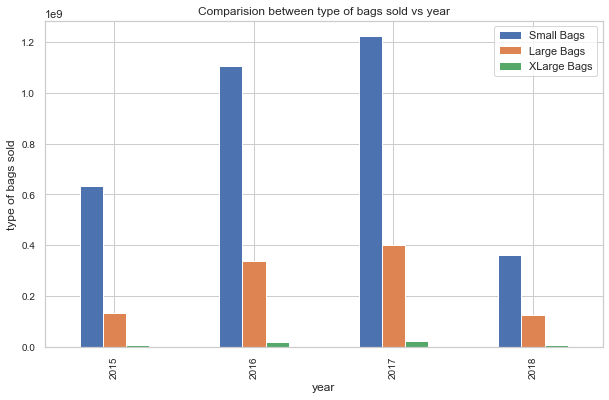

In [22]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.year).sum()

feature.plot(kind = 'bar', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('year')

plt.ylabel('type of bags sold')

plt.show()

In [23]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})

In [24]:
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

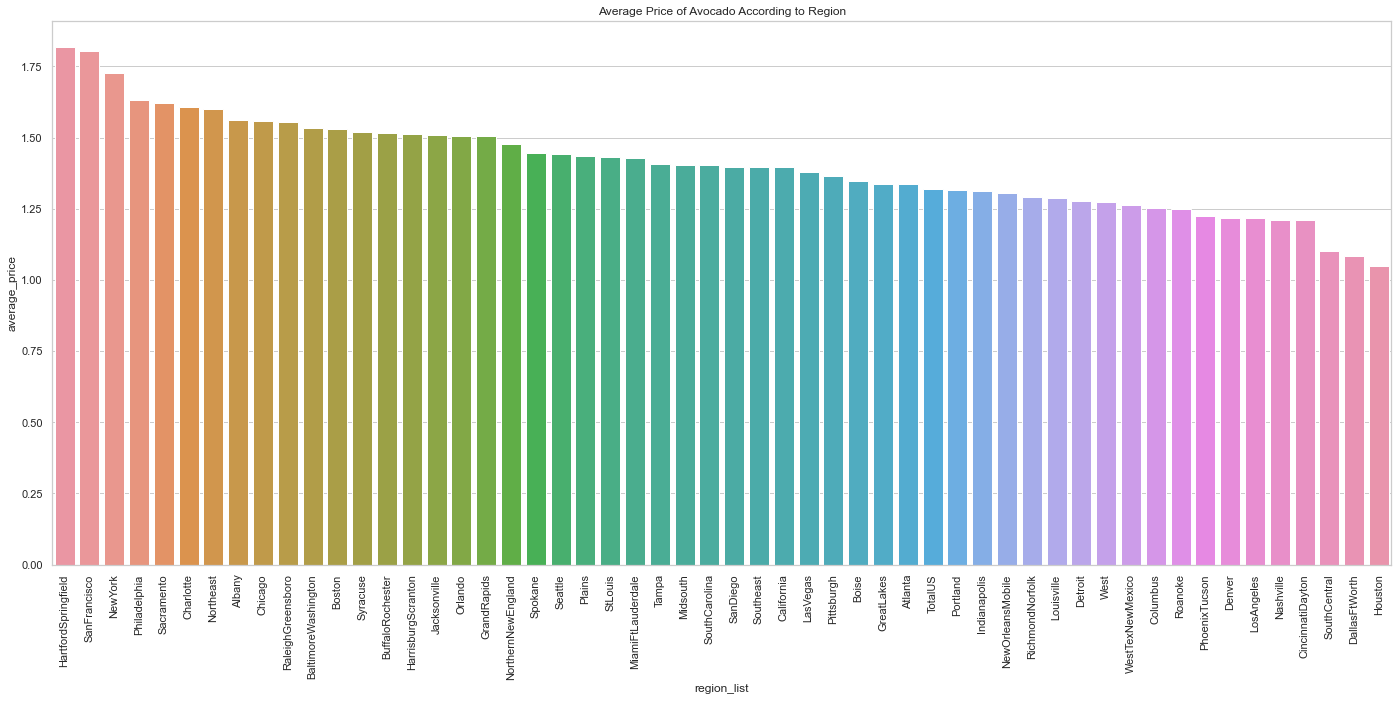

In [25]:
plt.figure(figsize=(24,10))
sns.barplot(x='region_list',y='average_price',data=sorted_data)
plt.xticks(rotation=90)
plt.title('Average Price of Avocado According to Region')
plt.show()

In [26]:
# All the numerical data are skewed.
# Convential type is more dominant than Organic one.
# Top 3 region for avearge_price are HartfordSpringfield,SanFrancisco and NewYork

-------------------------------------------------------------------------------------------------------------------------------

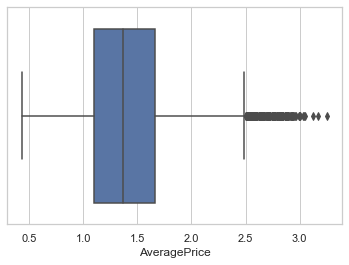

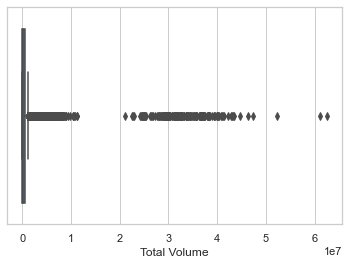

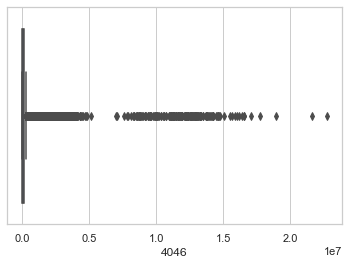

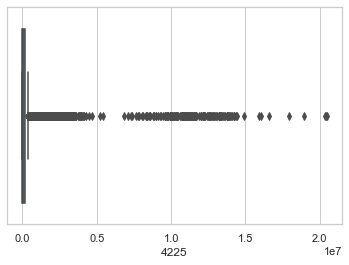

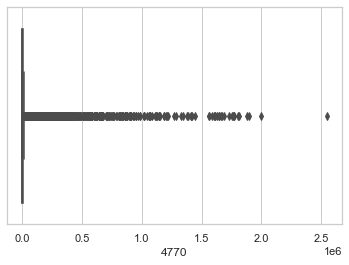

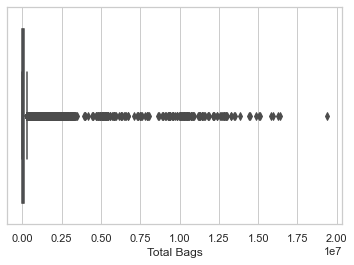

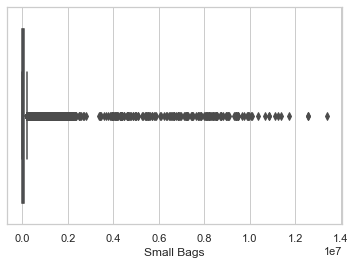

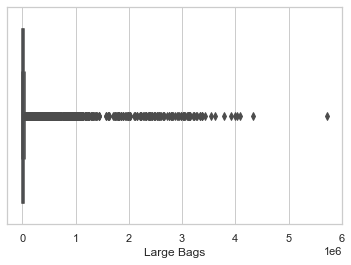

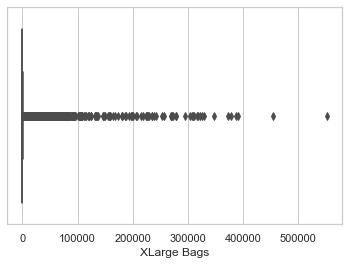

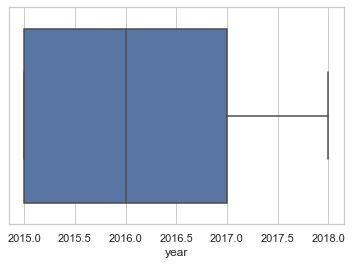

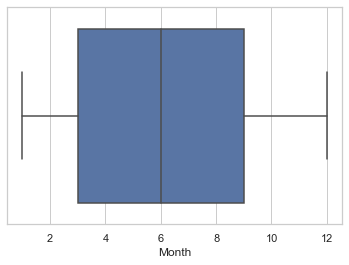

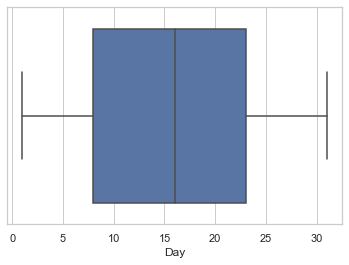

In [27]:
# Check outliers using boxplot
for col in df_num.columns:
    sns.boxplot(df_num[col])
    
    plt.show()

##### OUTLIERS treatment

In [28]:
# z-score Method
# Features containing outliers
# final data
df_final=pd.concat([df_num,df_cat], axis=1)

outliers = df_final[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(outliers))
df_new = df_final[(z < 3).all(axis = 1)] 

In [30]:
df_new.shape

(17782, 14)

In [31]:
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  year  Month  Day          type  \
0         8603.62       93.25          0.0  2015     12   27  conventional   
1         9408.07       97.49          0.0  2015     12   20  conventional   
2         8042.21      103.14          0.0  2015     12   13  conventional   
3         5677.40      133.76          0.0  2015     12    6  conventional   
4         5986.26      197.69          0.0  2015     11   29  conventional   
...           ...         ...          ...   ...    ...  ...           ...   
18244    13066.82      431.85          0.0  2018      2    4       organic   
18245     8940.04      324.80          0.0  2018      1   28       organic   
18246     9351.80       42.31          0.0  2018      1   21       organic   
18247    10919.54       50.00          0.0  2018      1   14       organic   
18248    11988.14       26.01          0.0  2018      1    7       organic   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[17782 rows x 14 columns]

In [32]:
# data loss
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(f'data loss is : {data_loss:0.1f}%')

data loss is : 2.6%


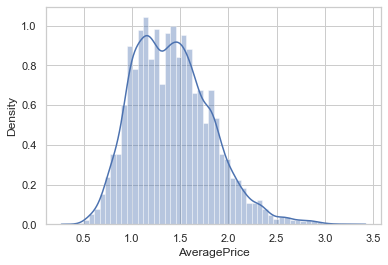

In [33]:
# check the normality of the target value
sns.distplot(df_new.AveragePrice)
plt.show()

In [34]:
# check skewness
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

##### Normality of the target value is good and fairly follow ND curve , others features are very skewed except year, month and day features

In [35]:
# Removing skewness using yeo-johnson method to get better prediction
scaler = PowerTransformer()
df_new[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]=scaler.fit_transform(df_new[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])

In [36]:
# check skewness
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

### Bivariate analysis

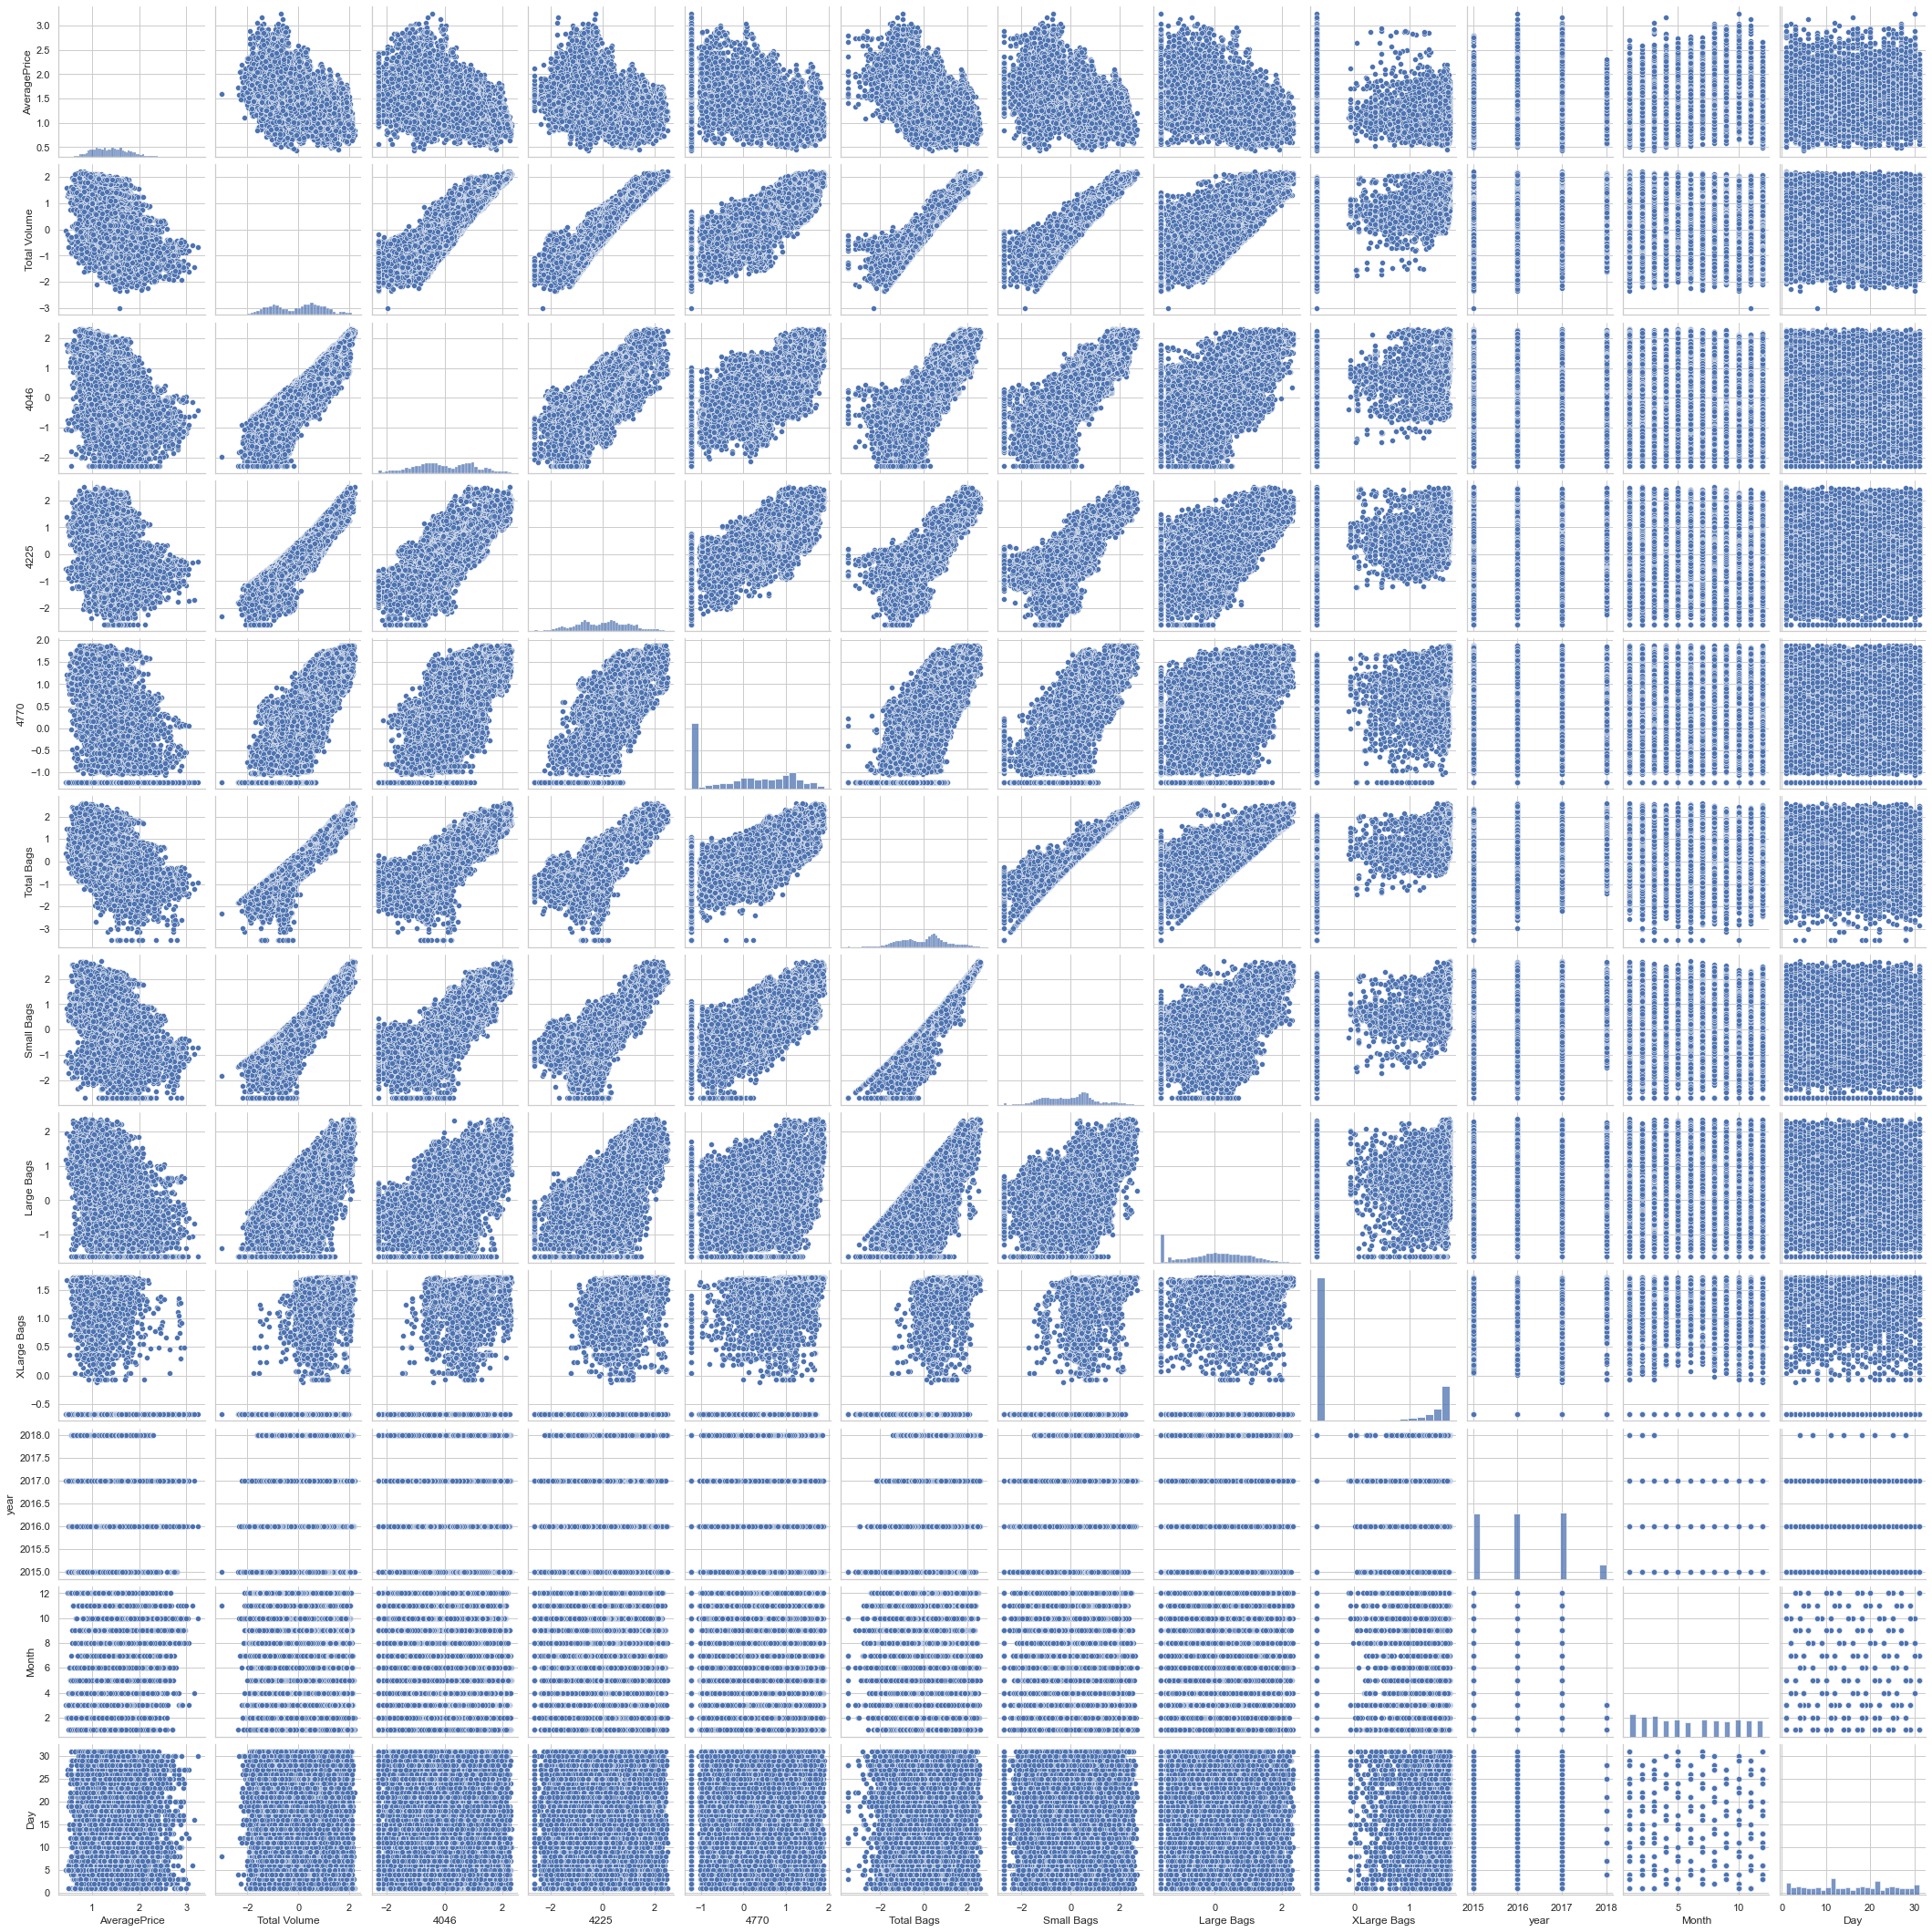

In [37]:
sns.pairplot(df_new)
plt.show()

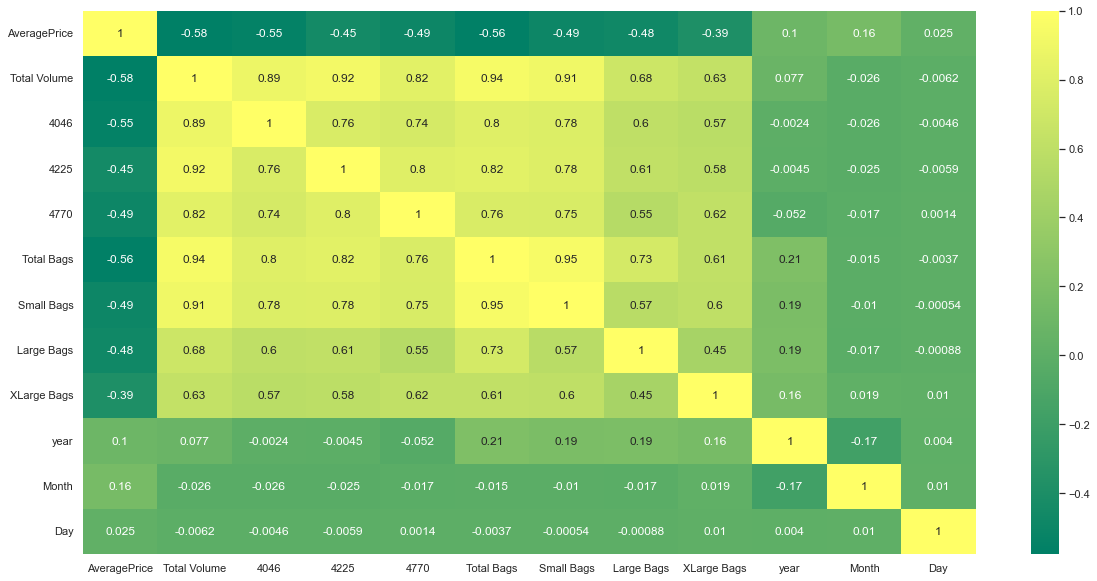

In [38]:
# heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), annot=True,cmap='summer')
plt.show()

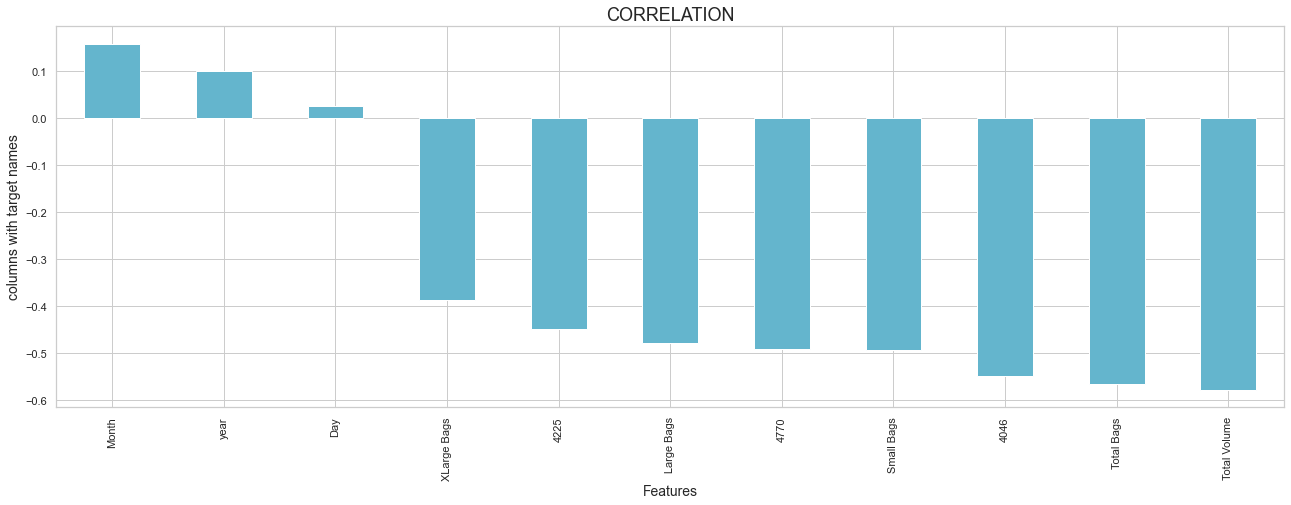

In [39]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(22,7))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [40]:
# Drop day feature
df_new.drop('Day',axis=1,inplace=True)

-----------------------------------------------------------------------------------------------------------------------------

In [41]:
# Handling Categorical features for train data 
cat_col = ["type","region"]

#### The best way is to use getdummies method but there will be many features that why i will use labelencoder

In [42]:
LE = LabelEncoder()

df_new[cat_col] = df_new[cat_col].apply(LE.fit_transform)

df_new[cat_col]


type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

In [43]:
df_new

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  year  Month  type  region  
0       -0.337064   -0.775214    -0.675702  2015     12     0       0  
1       -0.301038   -0.765237    -0.675702  2015     12     0       0  
2       -0.364044   -0.752534    -0.675702  2015     12     0       0  
3       -0.500341   -0.693012    -0.675702  2015     12     0       0  
4       -0.479918   -0.600755    -0.675702  2015     11     0       0  
...           ...         ...          ...   ...    ...   ...     ...  
18244   -0.165765   -0.405895    -0.675702  2018      2     1      53  
18245   -0.321645   -0.478556    -0.675702  2018      1     1      53  
18246   -0.303466   -0.945246    -0.675702  2018      1     1      53  
18247   -0.240252   -0.910471    -0.675702  2018      1     1      53  
18248   -0.201685   -1.042930    -0.675702  2018      1     1      53  

[17782 rows x 13 columns]

In [45]:
# seperate features in x & y labels
x = df_new[df_new.columns.difference(['AveragePrice'])]
y = df_new.AveragePrice

##### Standarization of data

In [46]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

4046      4225      4770  Large Bags     Month  Small Bags  \
0     -0.649918  0.358278 -0.212550   -0.775214  1.641434   -0.337064   
1     -0.770067  0.276355 -0.165117   -0.765237  1.641434   -0.301038   
2     -0.724508  0.656010  0.034215   -0.752534  1.641434   -0.364044   
3     -0.625017  0.475615 -0.110976   -0.693012  1.641434   -0.500341   
4     -0.677083  0.268966 -0.100289   -0.600755  1.358706   -0.479918   
...         ...       ...       ...         ...       ...         ...   
17777 -0.454078 -0.922232 -1.224990   -0.405895 -1.185845   -0.165765   
17778 -0.610403 -0.665649 -1.224990   -0.478556 -1.468572   -0.321645   
17779 -0.610350 -0.774395  0.455355   -0.945246 -1.468572   -0.303466   
17780 -0.539211 -0.711605  0.455045   -0.910471 -1.468572   -0.240252   
17781 -0.351503 -0.787209  0.168008   -1.042930 -1.468572   -0.201685   

       Total Bags  Total Volume  XLarge Bags    region      type      year  
0       -0.527445     -0.065094    -0.675702 -1.698613 -1.026443 -1.214908  
1       -0.488205     -0.137269    -0.675702 -1.698613 -1.026443 -1.214908  
2       -0.556204      0.215503    -0.675702 -1.698613 -1.026443 -1.214908  
3       -0.702370      0.029840    -0.675702 -1.698613 -1.026443 -1.214908  
4       -0.675712     -0.170456    -0.675702 -1.698613 -1.026443 -1.214908  
...           ...           ...          ...       ...       ...       ...  
17777   -0.331042     -0.668931    -0.675702  1.742552  0.974238  1.979143  
17778   -0.499550     -0.762380    -0.675702  1.742552  0.974238  1.979143  
17779   -0.493424     -0.766344    -0.675702  1.742552  0.974238  1.979143  
17780   -0.424475     -0.692595    -0.675702  1.742552  0.974238  1.979143  
17781   -0.383676     -0.658062    -0.675702  1.742552  0.974238  1.979143  

[17782 rows x 12 columns]

------------------------------------------------------------------------------------------------------------------------------

###  Feature Reduction

#### F-regression

In [48]:
F_values, p_values  = f_regression(x, y )

In [50]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(x.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [53]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(11)

In [54]:
f_reg_results

Variable       F_Value P_Value
0           4046   7655.691379   0.000
1           4225   4479.041448   0.000
2           4770   5657.771238   0.000
3     Large Bags   5262.069247   0.000
4          Month    454.632786   0.000
5     Small Bags   5728.000197   0.000
6     Total Bags   8320.664323   0.000
7   Total Volume   8865.945516   0.000
8    XLarge Bags   3137.396187   0.000
10          type  10451.559014   0.000

In [55]:
l1_fr=f_reg_results[:]['Variable'].values  # CI=0.9 

In [56]:
l1_fr

array(['4046', '4225', '4770', 'Large Bags', 'Month', 'Small Bags',
       'Total Bags', 'Total Volume', 'XLarge Bags', 'type'], dtype=object)

#### SKB

In [59]:
SKB = SelectKBest(f_classif, k=6).fit(x, y )

In [60]:
l2_skb = x.columns[SKB.get_support()]

In [61]:
l2_skb

Index(['4046', '4770', 'Small Bags', 'Total Bags', 'Total Volume', 'type'], dtype='object')

In [62]:
list(set(list(l1_fr)+list(l2_skb)))

['4225',
 '4770',
 'Total Bags',
 'Small Bags',
 '4046',
 'Total Volume',
 'Month',
 'type',
 'XLarge Bags',
 'Large Bags']

In [72]:
final_list= ['4225',
 '4770',
 #'Total Bags',
 'Small Bags',
 '4046',
 #'Total Volume',
 'Month',
 'type',
 'XLarge Bags',
 'Large Bags']

#### VIF check Multicollinarity

In [73]:
x=x[final_list]

In [74]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [75]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

VIF_Factor     features
0    4.043453         4225
1    3.771840         4770
2    3.560192   Small Bags
5    3.434251         type
3    3.406381         4046
6    1.950854  XLarge Bags
7    1.749757   Large Bags
4    1.003830        Month

The recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables. so i will not remove any features.

-------------------------------------------------------------------------------------------------------------------------------

## ML Alogs

In [87]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.48850698297083694 seen for random state: 23


In [88]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

### LR

In [98]:
# Checking r2score for Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# predict
predlr = lr.predict(x_test)
print('R2_score:', r2_score(y_test, predlr))
print('MAE:', mean_absolute_error(y_test, predlr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predlr)))

# Checking Cross_Validation score for Linear Regression
print('Cross_Validaton_Score', cross_val_score(lr, x, y, cv = 5).mean())

R2_score: 0.48850698297083694
MAE: 0.22695952987791462
RMSE: 0.2940463442744882
Cross_Validaton_Score -0.11455749855895514


### KNN

In [96]:
knn = KNeighborsRegressor()

knn.fit(x_train, y_train)

# predict

predknn = knn.predict(x_test)

print('R2_Score:',r2_score(y_test, predknn))

print('MAE:',mean_absolute_error(y_test, predknn))

print('RMSE:',np.sqrt(mean_squared_error(y_test, predknn)))

# Checking Cross_Validaton score for KNN
print('Cross_Validaton_Score', cross_val_score(knn, x, y, cv = 5).mean())

R2_Score: 0.7908278156316436
MAE: 0.1302123256860099
RMSE: 0.18803898390808693
Cross_Validaton_Score -0.1775454562097085


###  Random Forest Regressor

In [99]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# predict

predrfr = rfr.predict(x_test)

print('R2_Score:',r2_score(y_test, predrfr))

print('MAE:',mean_absolute_error(y_test, predrfr))

print('RMSE:',np.sqrt(mean_squared_error(y_test, predrfr)))

# Checking Cross_Validaton score for KNN
print('Cross_Validaton_Score', cross_val_score(rfr, x, y, cv = 5).mean())

R2_Score: 0.8107373585671
MAE: 0.12302352676563204
RMSE: 0.17886624030494885
Cross_Validaton_Score 0.026687753239779833


### GBR

In [100]:
gb = GradientBoostingRegressor()

gb.fit(x_train, y_train)

# predict

predgb = gb.predict(x_test)

print('R2_Score:',r2_score(y_test,predgb))

print('MAE:',mean_absolute_error(y_test, predgb))

print('RMSE: ', np.sqrt(mean_squared_error(y_test, predgb)))

# Checking Cross_Validaton score for GradientBoosting Regressor
print('Cross_Validaton_Score', cross_val_score(gb, x, y, cv = 5).mean())

R2_Score: 0.6546525518105366
MAE: 0.18111483507177403
RMSE:  0.24161509056369018
Cross_Validaton_Score 0.09931063333052959


### SVM Regressor

In [103]:
svr = SVR()

svr.fit(x_train, y_train)

# predict

predsvr = svr.predict(x_test)

print('R2_Score:', r2_score(y_test, predsvr))

print('MAE:', mean_absolute_error(y_test, predsvr))

print('RMSE:', np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 

print('Cross_Validaton_Score', cross_val_score(svr, x, y, cv = 5).mean())

R2_Score: 0.682341459257984
MAE: 0.16914738415802588
RMSE: 0.23172676467982922
Cross_Validaton_Score 0.08400462904867145


### XGB

In [101]:
xgb = xgboost.XGBRegressor()

xgb.fit(x_train, y_train)

# predict

predxgb = xgb.predict(x_test)

print('R2_Score:', r2_score(y_test, predxgb))

print('MAE:', mean_absolute_error(y_test, predxgb))

print('RMSE:', np.sqrt(mean_squared_error(y_test, predxgb)))

# Checking cv score for SVR 

print('Cross_Validaton_Score', cross_val_score(xgb, x, y, cv = 5).mean())

R2_Score: 0.7712936744707775
MAE: 0.14171508848774395
RMSE: 0.1966233169144225
Cross_Validaton_Score 0.05617668763717278


In [ ]:
# i will tune RFR as it has the best score among the oothers algos.

### Hyper Parameter Tuning

In [107]:
rf_param={'n_estimators':[200,500,700,1000],'max_depth':[10,20,30,40],'max_features':['sqrt','auto']
          ,'min_samples_split':[2,5,7,10],'min_samples_leaf':[1,2,4]}
rf_model =GridSearchCV(rfr,rf_param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [108]:
rf_model.best_params_ 

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [109]:
rf_model.best_score_                   

-0.03178331202982101

In [111]:
rf_model_final = RandomForestRegressor(n_estimators=700, max_depth=40,min_samples_leaf=1,min_samples_split=2
                                        ,max_features= 'auto',n_jobs=-1,verbose=2).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 700building tree 2 of 700building tree 3 of 700


building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700
building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700
building tree 29 of 700
building tree 30 of 700
building tree 31 of 700
building tree 32 of 700
building tree 33 of 700
building tree 34 of 700
building tree 35 of 700
building tree 36 of 700
building tree 37 of 700
building tree 38 of 700
building tree 39 of 700
building tree 40 of 700


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s


building tree 41 of 700
building tree 42 of 700
building tree 43 of 700
building tree 44 of 700
building tree 45 of 700
building tree 46 of 700
building tree 47 of 700
building tree 48 of 700
building tree 49 of 700
building tree 50 of 700
building tree 51 of 700
building tree 52 of 700
building tree 53 of 700
building tree 54 of 700
building tree 55 of 700
building tree 56 of 700
building tree 57 of 700
building tree 58 of 700
building tree 59 of 700
building tree 60 of 700
building tree 61 of 700
building tree 62 of 700
building tree 63 of 700building tree 64 of 700

building tree 65 of 700
building tree 66 of 700
building tree 67 of 700
building tree 68 of 700
building tree 69 of 700
building tree 70 of 700
building tree 71 of 700
building tree 72 of 700
building tree 73 of 700
building tree 74 of 700
building tree 75 of 700
building tree 76 of 700
building tree 77 of 700
building tree 78 of 700
building tree 79 of 700
building tree 80 of 700
building tree 81 of 700
building tree 82

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.2s



building tree 161 of 700
building tree 162 of 700
building tree 163 of 700
building tree 164 of 700
building tree 165 of 700
building tree 166 of 700
building tree 167 of 700
building tree 168 of 700
building tree 169 of 700
building tree 170 of 700
building tree 171 of 700
building tree 172 of 700
building tree 173 of 700
building tree 174 of 700
building tree 175 of 700
building tree 176 of 700
building tree 177 of 700
building tree 178 of 700
building tree 179 of 700
building tree 180 of 700
building tree 181 of 700
building tree 182 of 700
building tree 183 of 700
building tree 184 of 700
building tree 185 of 700
building tree 186 of 700
building tree 187 of 700
building tree 188 of 700
building tree 189 of 700
building tree 190 of 700
building tree 191 of 700
building tree 192 of 700
building tree 193 of 700
building tree 194 of 700
building tree 195 of 700
building tree 196 of 700
building tree 197 of 700
building tree 198 of 700
building tree 199 of 700
building tree 200 of 700

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   11.0s


building tree 363 of 700
building tree 364 of 700
building tree 365 of 700
building tree 366 of 700
building tree 367 of 700
building tree 368 of 700
building tree 369 of 700
building tree 370 of 700
building tree 371 of 700
building tree 372 of 700
building tree 373 of 700
building tree 374 of 700
building tree 375 of 700
building tree 376 of 700
building tree 377 of 700
building tree 378 of 700
building tree 379 of 700
building tree 380 of 700
building tree 381 of 700
building tree 382 of 700
building tree 383 of 700
building tree 384 of 700
building tree 385 of 700
building tree 386 of 700
building tree 387 of 700
building tree 388 of 700
building tree 389 of 700
building tree 390 of 700
building tree 391 of 700
building tree 392 of 700building tree 393 of 700

building tree 394 of 700
building tree 395 of 700
building tree 396 of 700
building tree 397 of 700
building tree 398 of 700
building tree 399 of 700
building tree 400 of 700
building tree 401 of 700
building tree 402 of 700


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   19.1s



building tree 652 of 700
building tree 653 of 700
building tree 654 of 700
building tree 655 of 700
building tree 656 of 700
building tree 657 of 700
building tree 658 of 700
building tree 659 of 700
building tree 660 of 700
building tree 661 of 700
building tree 662 of 700
building tree 663 of 700
building tree 664 of 700
building tree 665 of 700
building tree 666 of 700
building tree 667 of 700
building tree 668 of 700
building tree 669 of 700
building tree 670 of 700
building tree 671 of 700
building tree 672 of 700
building tree 673 of 700
building tree 674 of 700
building tree 675 of 700
building tree 676 of 700
building tree 677 of 700
building tree 678 of 700
building tree 679 of 700
building tree 680 of 700
building tree 681 of 700
building tree 682 of 700
building tree 683 of 700
building tree 684 of 700
building tree 685 of 700
building tree 686 of 700
building tree 687 of 700
building tree 688 of 700
building tree 689 of 700
building tree 690 of 700
building tree 691 of 700

[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   20.8s finished


In [112]:
train_pred=rfr.predict(x_train)
test_pred=rfr.predict(x_test)

In [113]:
r_squared = r2_score(y_train, train_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.9732


In [114]:
r_squared = r2_score(y_test, test_pred)
print('The train R-square value is: ', r_squared.round(4))

The train R-square value is:  0.8107


In [115]:
mse = mean_squared_error(y_test, test_pred)
print('Mean absolute error :', mean_absolute_error(y_test,test_pred))
print('RMSE = ', np.sqrt(mse).round(4))

Mean absolute error : 0.12302352676563204
RMSE =  0.1789


## Saving Model

In [119]:
# Save the model as .pkl
import joblib
joblib.dump(rf_model_final, 'Avocado.pkl')

['Avocado.pkl']

In [120]:
# load model and get predictions

model=joblib.load('Avocado.pkl')

#Predict

prediction = model.predict(x_test)

prediction

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.6s finished


array([1.38234286, 1.51002857, 1.33915714, ..., 1.51645714, 1.78512857,
       1.85407143])

In [121]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   18.4s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:   18.4s finished


0         1         2         3         4         5     \
Predicted  1.382343  1.510029  1.339157  0.916329  0.803129  0.983786   
Original   1.210000  1.550000  1.370000  0.980000  0.820000  0.860000   

               6         7         8         9     ...      4436      4437  \
Predicted  0.950286  1.865757  1.709543  1.448914  ...  1.245614  1.286943   
Original   0.950000  1.970000  1.370000  1.460000  ...  1.210000  1.280000   

               4438      4439      4440    4441      4442      4443      4444  \
Predicted  1.311829  1.026186  1.709371  1.7375  1.489871  1.516457  1.785129   
Original   1.220000  1.010000  1.880000  1.5300  1.390000  1.300000  1.930000   

               4445  
Predicted  1.854071  
Original   1.720000  

[2 rows x 4446 columns]

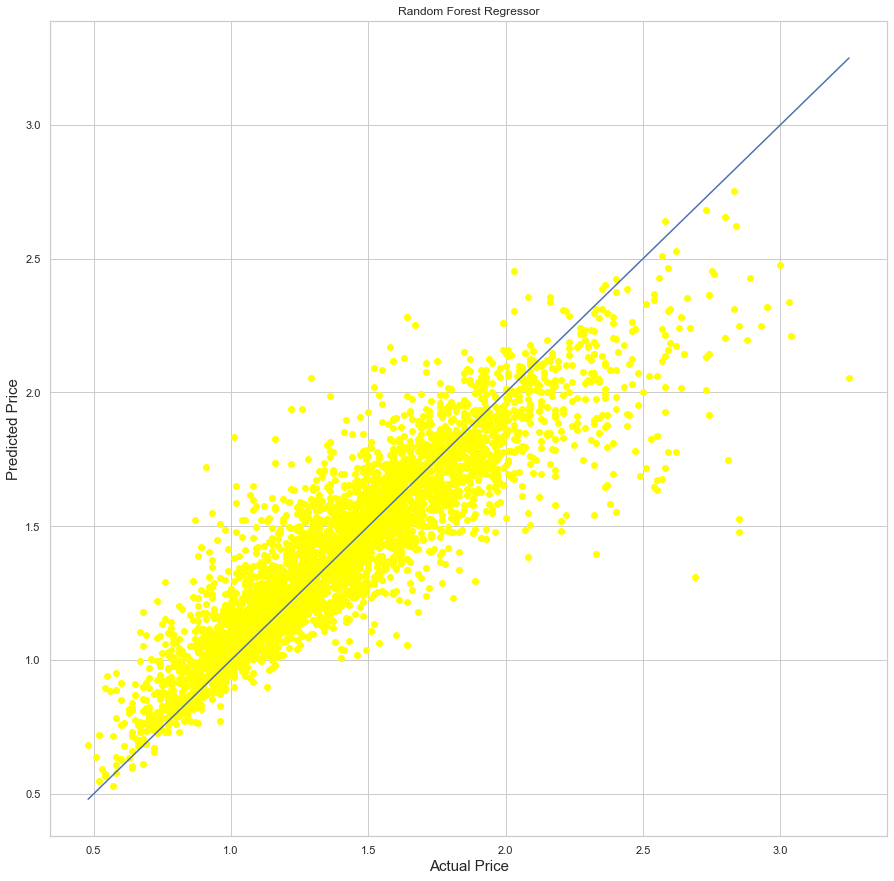

In [122]:
plt.figure(figsize=(15, 15))

plt.scatter(y_test, prediction, c ='Yellow')

plt1 = max(max(prediction), max(y_test))

plt2 = min(min(prediction), min(y_test))

plt.plot([plt1, plt2], [plt1, plt2], 'b-')

plt.title('Random Forest Regressor')

plt.xlabel('Actual Price', fontsize = 15)

plt.ylabel('Predicted Price', fontsize = 15)

plt.show()

------------------------------------------------------------------------------------------------------------------------------

### Classification model 

In [123]:
#Classification problem

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
# seperate features in x & y labels
x = df_clf[df_clf.columns.difference(['region'])]
y = df_clf.region

In [148]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

4046      4225      4770  AveragePrice  Large Bags     Month  \
0     -0.649918  0.358278 -0.212550     -0.212660   -0.775214  1.641434   
1     -0.770067  0.276355 -0.165117     -0.162942   -0.765237  1.641434   
2     -0.724508  0.656010  0.034215     -1.207026   -0.752534  1.641434   
3     -0.625017  0.475615 -0.110976     -0.834139   -0.693012  1.641434   
4     -0.677083  0.268966 -0.100289     -0.336956   -0.600755  1.358706   
...         ...       ...       ...           ...         ...       ...   
17777 -0.454078 -0.922232 -1.224990      0.533114   -0.405895 -1.185845   
17778 -0.610403 -0.665649 -1.224990      0.731987   -0.478556 -1.468572   
17779 -0.610350 -0.774395  0.455355      1.129733   -0.945246 -1.468572   
17780 -0.539211 -0.711605  0.455045      1.278888   -0.910471 -1.468572   
17781 -0.351503 -0.787209  0.168008      0.508255   -1.042930 -1.468572   

       Small Bags  Total Bags  Total Volume  XLarge Bags      type      year  
0       -0.337064   -0.527445     -0.065094    -0.675702 -1.026443 -1.214908  
1       -0.301038   -0.488205     -0.137269    -0.675702 -1.026443 -1.214908  
2       -0.364044   -0.556204      0.215503    -0.675702 -1.026443 -1.214908  
3       -0.500341   -0.702370      0.029840    -0.675702 -1.026443 -1.214908  
4       -0.479918   -0.675712     -0.170456    -0.675702 -1.026443 -1.214908  
...           ...         ...           ...          ...       ...       ...  
17777   -0.165765   -0.331042     -0.668931    -0.675702  0.974238  1.979143  
17778   -0.321645   -0.499550     -0.762380    -0.675702  0.974238  1.979143  
17779   -0.303466   -0.493424     -0.766344    -0.675702  0.974238  1.979143  
17780   -0.240252   -0.424475     -0.692595    -0.675702  0.974238  1.979143  
17781   -0.201685   -0.383676     -0.658062    -0.675702  0.974238  1.979143  

[17782 rows x 12 columns]

In [132]:
x.drop(['Total Bags','Total Volume'],axis=1,inplace=True)

In [133]:
x.columns

Index(['4046', '4225', '4770', 'AveragePrice', 'Large Bags', 'Month',
       'Small Bags', 'XLarge Bags', 'type_organic', 'year'],
      dtype='object')

In [136]:
# seperate features in x & y labels
x = df_new[df_new.columns.difference(['region'])]
y = df_new.region

### ML Alogs

In [140]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if (roc_auc_score(pred_train,y_train)*100)==(roc_auc_score(y_test,pred_test)*100):
        #print("At random state ",i," The model performs very well")
    print("At random_state: ",i)
    print("Training roc_auc_score is :",round(roc_auc_score(y_train,pred_train)*100,1))
    print("Testing roc_auc_score is:",round(roc_auc_score(y_test,pred_test)*100,1),  '\n\n')

At random_state:  0


ValueError: multi_class must be in ('ovo', 'ovr')

In [144]:
#finding the best random state
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.22549203373945642  on Random_state  80


In [145]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8099415204678363  on Random_state  21


In [146]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.9224021592442645  on Random_state  97


In [147]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.6072874493927125  on Random_state  30


In [149]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=97)

In [150]:
# chose RFC as best model
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc=accuracy_score(y_test, pred)

# Checking Cross_Validaton score for rfc
print('Cross_Validaton_Score', cross_val_score(rf, x, y, cv = 5).mean())

Cross_Validaton_Score 0.6735398253036757


-------------------------------------------------------------------------------------------------------------------------------

## Saving the model

In [151]:
import joblib
joblib.dump(rf,'Avocado_region.pkl')

['Avocado_region.pkl']

In [152]:
#load the model
model=joblib.load("Avocado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([11, 44, 27, ...,  5, 28, 11])

In [153]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","Actual value"])

0     1     2     3     4     5     6     7     8     9     \
Predicted value    11    44    27    25    32    43    39     8    40    30   
Actual value       11    44    27    25    32    43    39     8    40    30   

                 ...  4436  4437  4438  4439  4440  4441  4442  4443  4444  \
Predicted value  ...     3     3    13    21     8    36     5     5    28   
Actual value     ...     3     3    13    21     8     9     5     5    28   

                 4445  
Predicted value    11  
Actual value       11  

[2 rows x 4446 columns]